In [6]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [7]:
print(cv2.__version__)

4.1.1


In [8]:
# haarcascade_russian_plate_number
# C:\\Users\\Jai\\Desktop\\dtu_ML_workshop\\opencv-master\\data\\haarcascades\\haarcascade_licence_plate_rus_16stages.xml

# haarcascade_licence_plate_rus_16stages
# C:\\Users\\Jai\\Desktop\\dtu_ML_workshop\\opencv-master\\data\\haarcascades\\haarcascade_licence_plate_rus_16stages.xml


In [13]:
def extract_plate(img): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()
    
    plate="not yet"
    
    #Loads the data required for detecting the license plates from cascade classifier.
    plate_cascade = cv2.CascadeClassifier('indian_license_plate.xml')
    plate_cascade = cv2.CascadeClassifier('dj_number_plate1.xml')
    plate_cascade = cv2.CascadeClassifier('cascade4.xml')    
    #plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
    #plate_cascade = cv2.CascadeClassifier('haarcascade_licence_plate_rus_16stages.xml')
    #plate_cascade = cv2.CascadeClassifier('cars.xml')

    # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.1, minNeighbors = 6)

    for (x,y,w,h) in plate_rect:
        a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1])) #parameter tuning
        #print(a,b)
        #a=100
        #b=200
        
        plate = plate_img[y:y+h-1, x:x+w-1, :]
        #plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
        
        print(x,y,w,h)
        print("plate_rect",plate_rect.shape)
        #print(plate)
        # finally representing the detected contours by drawing rectangles around the edges.
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 2)

    plt.imshow(plate_img)
    plt.show()
    if(plate!="not yet"):
        plt.imshow(plate)
        plt.show()    
    return plate_img, plate # returning the processed image

In [14]:
# c_img=cv2.imread("car1.jfif")
# c_img=cv2.cvtColor(c_img,cv2.COLOR_BGR2RGB)
# plt.imshow(c_img)
# plt.show()
# print(c_img.shape)
# #c_img=cv2.imread("car.jpeg")[50:,50:250,:]
# c_img=cv2.imread("car.jpeg")[:176,:259,:]
# #c_img=cv2.imread("car.jpeg")
# c_img=cv2.cvtColor(c_img,cv2.COLOR_BGR2RGB)

# plt.imshow(c_img)
# plt.show()
# print(c_img.shape)

(168, 300, 3)


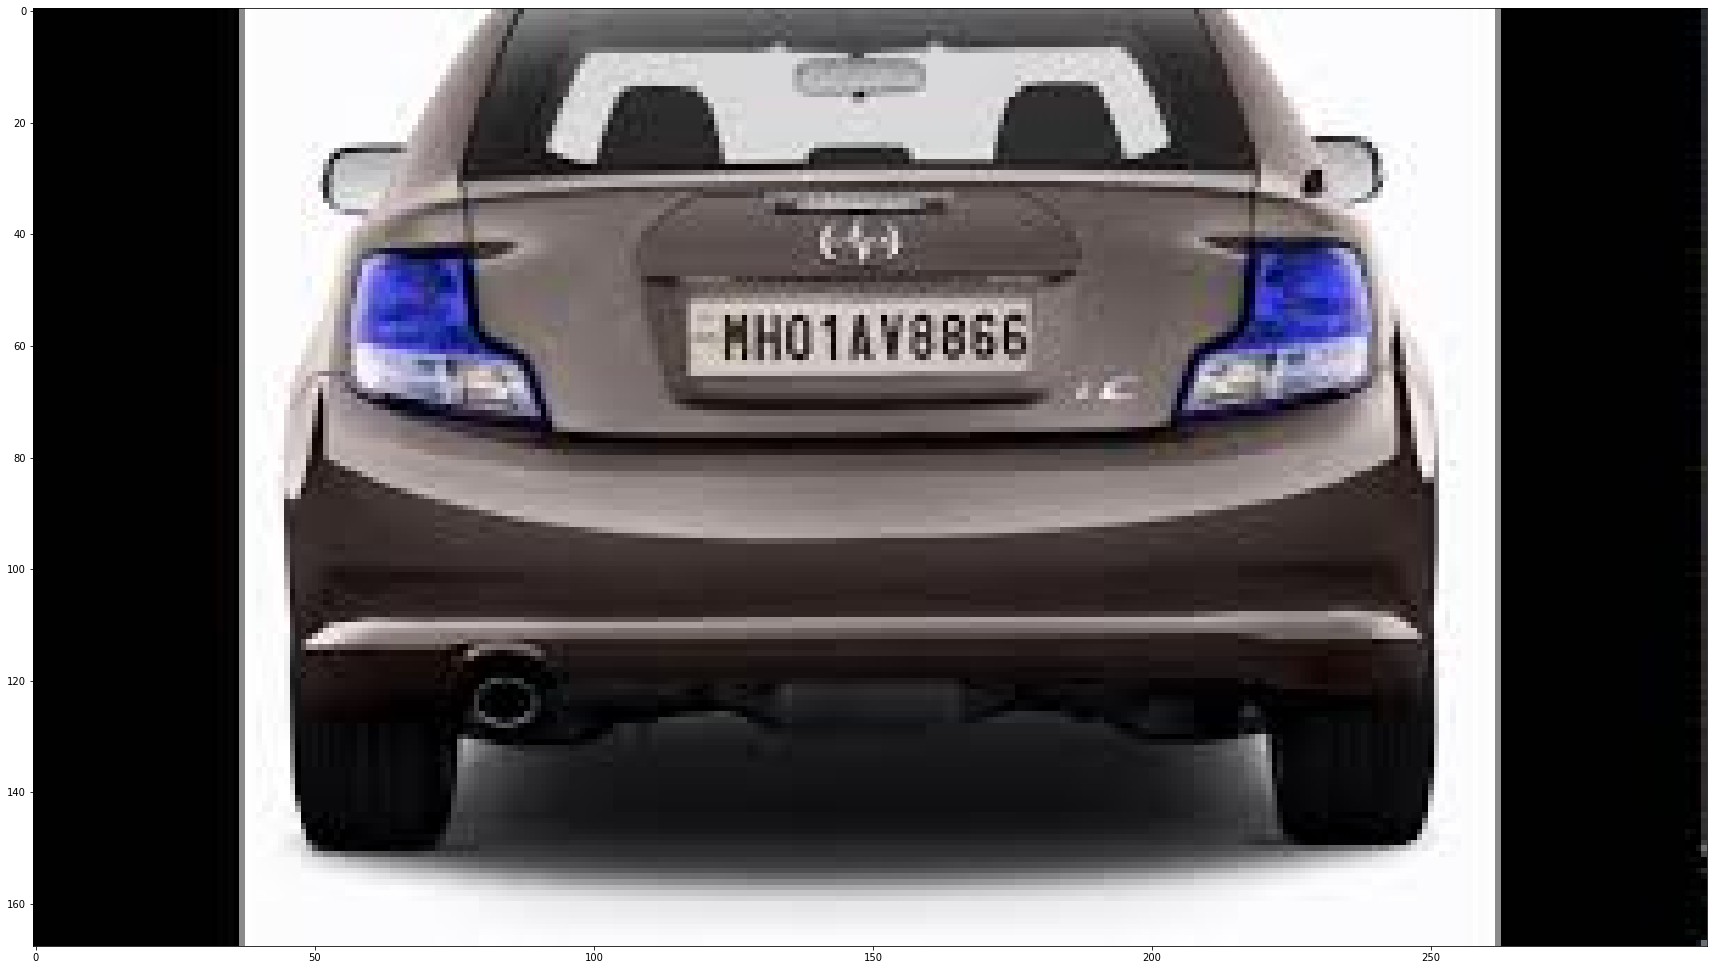

In [17]:
# weird probem bcoz of less training of haarcascade file
# try 1.1 and 1.3 in funtn
c_img=cv2.imread("car5.jfif")
# carX image analysis: working on 1 3 5 6,9, # weird problem  7,8

c_img=cv2.imread("car21.png")
c_img=cv2.imread("car19.jfif")

# Google image analysis
c_img=cv2.imread("g5.jfif")     # works well with 1.1,8,
#c_img=cv2.imread("g6.jfif")     # very little blur but less dark fonts so plate detection successful but char detection failed 
#c_img=cv2.imread("g7.jfif")     # very slight tilt works , doesnt work with min neighbours>9 
c_img=cv2.imread("g8.jfif")      # fails bcoz of multi detection , min neighbours increased , detection successful but bcoz of poor quality failed to read all characters
#c_img=cv2.imread("g9.jfif")      # poor quality hence completely fails
#c_img=cv2.imread("g10.jfif")     # poor quality hence first character is misinterpreted , removed a and b and this resulted in complete read
c_img=cv2.imread("g13.jfif")   #g5 adn g13 are same, good with high number of min neighbours , e.g 16
#c_img=cv2.imread("g14.png")    # had to scrap a and b
#c_img=cv2.imread("g15.jpg")     # failed
#c_img=cv2.imread("g18.jfif")    # problem of extraction of chars from multiplates
#c_img=cv2.imread("g17.jfif")    # fails bcoz of weak classifier
#c_img=cv2.imread("g19.jpg")     # multi plates , low qual image fails completely
#c_img=cv2.imread("g20.jfif")    # night car , not working , idk why
#c_img=cv2.imread("toll1.jpg")   # fail
#c_img=cv2.imread("hd1.jpg")      # fail
#c_img=cv2.imread("hd2.jpg")      # fail
#c_img=cv2.imread("./number_plates/p66.jpg")
#c_img=cv2.imread("k18.jpeg") 

#c_img=cv2.imread("eu2.jpg")
#c_img=cv2.imread("k17.jpeg")

# ALL BELOW TESTS ARE GIVING REAL PROBLEM
# c_img=cv2.imread("test2.jpg")   
# c_img=cv2.imread("test3.jpg")
# c_img=cv2.imread("test4.jpg")
# c_img=cv2.imread("test5.jpg")
# c_img=cv2.imread("test6.jpg")
#c_img=cv2.imread("g12.jpg") 
#c_img=cv2.imread("2.jpg")   # 2->8
# working 7 , # weird problem 2,3,5,8

#c_img=cv2.cvtColor(c_img,cv2.COLOR_BGR2RGB)
print(c_img.shape)
plt.figure(figsize=(30,30))
plt.imshow(c_img)
plt.show()
#plt.imshow(c_img)
#plt.subplots?
#a,f=plt.subplots(1,2)

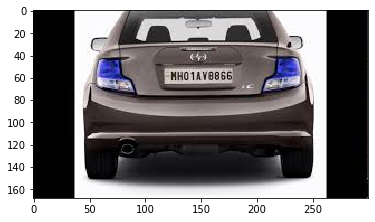

In [18]:
# p,f=plt.subplots(1,2)
car,p=extract_plate(c_img)
# plt.imshow(car)
# plt.show()
if p!="not yet":
    plt.imshow(p)
    plt.show()

In [369]:
# BIGGER CHALLENGE
# we may have to handle multi car images like 2 cars comming in, one leaving ,one entering
# leaving entering case can be handled by multiple cameras or some other idea
# multiple cars entering can be handled by ??



# MAIN THING TO FOCUS ON ----->>> A VERY GOOD CLASSIFIER , either make ur own or find on net


# problems,solns and summary
# need to apply flood fill algorithm for g3
# tilted plates like g4 not recognizable
# when multiple frames are considered take the one with maximum number of characters
# black front rectangle in car confuses the detector , maybe bcoz the detector isnt well trained, e.g g8
# if any other window appears then its taken by the detector in majority of cases e.g in g13 but it contains no characters so window comparision will have to be done
# after increasing the minneighbor number g13 showed only 2-3 wrong characters even after a lot of blur , 
# a and b are used for cropping the image and so sometimes they cropout one or two characters, e.g g14.png , a and b had to be removed , and so a and b too are hyerparameters
# 1.1 is the optimal choice and min neighbours=9
# tilted is detected with min neighbours uptill 9 (max)
#light incription on plates not detected , maybe bcoz of slight blur or else gotta do something
# very closely spaced letters arent detected by letter detector , e.g g15jpg
# if high number of detections then increase min neighbours accordingly ,for this we will have to scan for car number and compare accordingly
# character extractor not able to extract characters with a lot of shine  


# IMPORTANT , can lower our value  
# (DANGEROUS) 
# automatic number plate recognition  
# https://platerecognizer.com/blog/anpr-for-india/ 
# paid and so if we makeit as good as it is then we will be the best
# https://medium.com/datadriveninvestor/vehicle-number-plate-detection-and-ocr-tcs-humain-2019-a253019e52a1
# https://medium.com/@marklabinski/installing-tensorflow-object-detection-api-on-windows-10-7a4eb83e1e7b?source=email-272495dad7a5-1577647243314-digest.reader------0-72------------------4e56f80c_88d7_485a_a63e_67323b6049ba-28-----&sectionName=quickReads
# TAKE HELP OF API'S FOR TEXT EXTRCATIION or object detection

# WEB , APP
# users send pic of their license plate and this is analysed by ML algo , and then a response is sent which contains the numberplate in text format
# now user is asked to verify whether their plate is right or wrong
# users are supposed to send 2-3 clear images of plates so that their and proceed with verification protocol to get their vehicles registered


#  img_binary = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) ## better result    
#  put above thing in segment characters to work with a shiny plates


In [370]:
# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    

    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) #List that stores the character's binary image (unsorted)

    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
    
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [376]:
# Find characters in the resulting images
def segment_characters(image) :

    print("ANALYSING")
    
    # Preprocess cropped license plate image
    img = cv2.resize(image, (333, 75))      ###
    plt.imshow(image)
    plt.show()
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    ###
    print("GRAY")
    plt.imshow(img_gray)
    plt.show()
    
    _, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)  ### original
    #_, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)  ### yields even better result
    #img_binary = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) ## better result for plate with shine , e.g k17.jpeg 
    # problem results in a lot of dots and also gives problem with M's resolution in final image e.g
    print("cv2.THRESH_BINARY+cv2.THRESH_OTSU")
    plt.imshow(img_binary)
    plt.show()
    
    img_erode = cv2.erode(img_binary, (3,3))    ###
    print("cv2.erode")
    plt.imshow(img_erode)
    plt.show()
    
    img_dilate = cv2.dilate(img_erode, (3,3))   ###
    print("cv2.dilate")
    plt.imshow(img_dilate)
    plt.show()
    
    LP_WIDTH = img_dilate.shape[0]              ###
    LP_HEIGHT = img_dilate.shape[1]             ###
    
    # Make borders white
    img_dilate[0:3,:] = 255
    img_dilate[:,0:3] = 255
    img_dilate[72:75,:] = 255
    img_dilate[:,330:333] = 255
    print("make borders white")
    plt.imshow(img_dilate)
    plt.show()
    
    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3]

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_dilate)

    return char_list

c:\users\jai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


ANALYSING


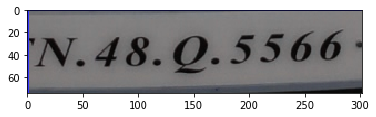

GRAY


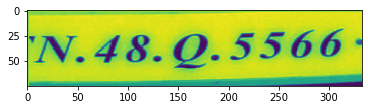

cv2.THRESH_BINARY+cv2.THRESH_OTSU


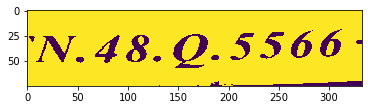

cv2.erode


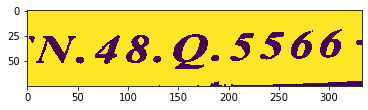

cv2.dilate


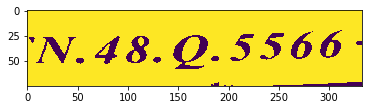

make borders white


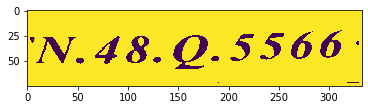

(1, 44, 24)


In [377]:
if p!="not yet":
    li=segment_characters(p)
print(li.shape)

IndexError: index 1 is out of bounds for axis 0 with size 1

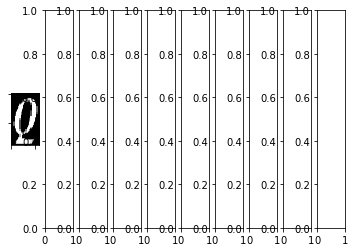

In [373]:
f,a=plt.subplots(1,10)
cnt=0

for i in li:
    i = cv2.morphologyEx(i, cv2.MORPH_CLOSE, (5,5))
    i = cv2.morphologyEx(i, cv2.MORPH_OPEN, (5,5))
    #i = cv2.morphologyEx(i, cv2.MORPH_GRADIENT, (3,3))
    a[cnt].set_yticklabels([])
    a[cnt].set_xticklabels([])
    a[cnt].imshow(i,cmap='gray')
    cnt+=1
print(li[1].shape)
plt.show()

# Start Training Neural CNN Network

In [665]:
data = pd.read_csv('image_data.csv')

In [669]:
print(data.tail(3))
print(data.shape)


     Unnamed: 0   p1   p2   p3   p4   p5   p6   p7   p8   p9  ...  p776  p777  \
777         777  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
778         778  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
779         779  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

     p778  p779  p780  p781  p782  p783  p784   y  
777   0.0   0.0   0.0   0.0   0.0   0.0   0.0  26  
778   0.0   0.0   0.0   0.0   0.0   0.0   0.0  26  
779   0.0   0.0   0.0   0.0   0.0   0.0   0.0  26  

[3 rows x 786 columns]
(780, 786)


In [76]:
# X = []
# Y = data['y']                              #storing the labels in Y
# del data['y']                               #deleting the column 'y'
# del data['Characters']                      # deleting the column 'Characters'
# for i in range(data.shape[0]):              #iterating over all the rows.
#     flat_pixels = data.iloc[i].values[1:]    #extracting pixel values
#     image = np.reshape(flat_pixels, (28,28)) #reshaping to 28x28p
#     X.append(image)                          #adding to input feature list

In [37]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import Flatten, MaxPool2D
# from keras.layers.convolutional import Conv2D
# from sklearn.model_selection import train_test_split
# import pandas as pd


# def CNN_model():
# # seed for reproducing same results
#     seed = 42
#     np.random.seed(seed)

#     # load dataset
#     data = pd.read_csv('image_data.csv')

#     # split into input and output variables
#     X = []
#     Y = data['y']
#     del data['y']
#     del data['Character']
#     for i in range(data.shape[0]):
#         flat_pixels = data.iloc[i].values[1:]
#         image = np.reshape(flat_pixels, (28,28))
#         X.append(image)

#     X = np.array(X)
#     Y = np.array(Y)

#     # split the data into training (50%) and testing (50%)
#     (X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.30, random_state=seed)

#     # one hot encode outputs
#     Y_test_for_accuracy_matrix = Y_test.copy()
#     Y_train = np_utils.to_categorical(Y_train)
#     Y_test = np_utils.to_categorical(Y_test)

#     #reshaping data
#     X_train = X_train.reshape(-1,28,28,1)
#     X_test  = X_test.reshape(-1,28,28,1)

#     num_classes = 37

#     print('done!!!')

#     ## create model
#     model_ = Sequential()
#     model_.add(Conv2D(32, (24,24), input_shape=(28, 28, 1), activation='relu'))
#     model_.add(MaxPooling2D(pool_size=(2, 2)))
#     model_.add(Dropout(0.4))
#     model_.add(Flatten())
#     model_.add(Dense(128, activation='relu'))
#     model_.add(Dense(36, activation='softmax'))


#     # Compile model
#     model_.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model_.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=200, verbose=2)

#     # Final evaluation of the model
#     scores = model_.evaluate(X_test,Y_test, verbose=0)
#     print("CNN Error: %.2f%%" % (100-scores[1]*100))

#     from sklearn.metrics import accuracy_score
#     y_pred = model_.predict_classes(X_test)
#     acc = accuracy_score(Y_test_for_accuracy_matrix, y_pred)
#     print(f"Accuracy: {acc}")
    
#     return model_
    

In [38]:
# CNN_model()

# CAR DETECTION 

In [258]:
import cv2
import matplotlib.pyplot as plt
# cas1 , cas2, cas3, cas4, checkcas
# cas2 doesnt work
# detector=cv2.CascadeClassifier("C:\\Users\\Jai\\Desktop\\dtu_ML_workshop\\cars.xml")     
detector=cv2.CascadeClassifier("cas4.xml")     
# detector=cv2.CascadeClassifier("checkcas.xml")     

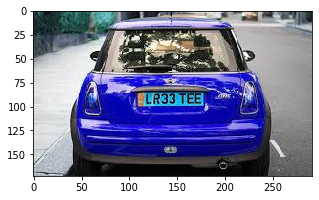

In [259]:
car = cv2.imread("car5.jfif")
plt.figure(figsize=(5,5))
plt.imshow(car)
plt.show()

In [261]:
cars=detector.detectMultiScale(car,1.1,10)
print(cars)

[[ 81  20 109  55]
 [134  47 115  58]]


In [262]:
x,y,w,h=cars[0] 

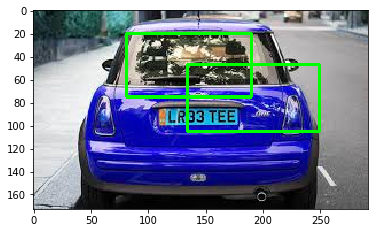

In [263]:
for x,y,w,h in cars:
    car=cv2.rectangle(car,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(car)
plt.show()

# IMAGE PROCESSING TECHNIQUE (from video)

In [2]:
import cv2
import imutils                            
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [38]:
image=cv2.imread("car13.jfif")
image.shape

(181, 278, 3)

In [39]:
image=imutils.resize(image,width=500)

In [41]:
cv2.imshow("Original image",image)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale image",gray)
cv2.waitKey(0)

-1

In [46]:
# Noise removal
g=gray
g=cv2.bilateralFilter(g,11,17,117)     # play with this parameter
cv2.imshow("2--Bilateral-filter",g)
cv2.waitKey(0)

-1

In [58]:
# Find edge of grayscale image
edged=cv2.Canny(gray,170,200)
cv2.imshow("3--Canny Edges",edged)
cv2.waitKey(0)
# Find contours based on edges
cnts,new=cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [77]:
# creating copy of original image to draw all contours
img1=image.copy()
cv2.drawContours(img1,cnts,-1,(0,255,0),3)
cv2.imshow("4-All Contours",img1)
cv2.imshow("new",edged)
cv2.waitKey(0)

-1

In [72]:
# Sort contours based on their area keeping minimum required area as '30' anything selected smaller than this wont be considered
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:30]
NumberPlateCnt=None   # we currently have one Number plate contour


In [73]:
# top 30 contours
img2=image.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3)
cv2.imshow("5--Top 30Contours",img2)
cv2.waitKey(0)

-1

In [79]:
import cv2
img =cv2.imread("hd1.jpg")
#img =cv2.imread("car13.jfif")
img = cv2.resize(img, (660, 340))
g=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edged_img=cv2.Canny(g,170,200)

cv2.imshow("3--Canny Edges",edged_img)

contours,new=cv2.findContours(edged_img.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:30]
cv2.drawContours(img, contours, -1, (0,255,0), 3)

cv2.imshow("4-All Contours",g)
cv2.imshow("new",img)
cv2.waitKey(0)

-1

In [80]:
#print(cnts)

In [90]:
import matplotlib.pyplot as plt
# loop over our contours to find best approx contour of our number plate
count=0    
idx=7     # to store the cropped image in certain location
for c in cnts:
    peri=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.2*peri,True)  # how many edges are there for the contour 0 for circle 4 for sq, rect
    
    #print(approx)
    
    if len(approx)==2:     # select contour with 4 corners
        NumberPlaeCnt=approx       # this is our approx number plate contour
        print("found")
        
        # crop those contours and store in cropped image folder
        
        x,y,w,h=cv2.boundingRect(c)
        new_image="lol"
        new_img=image[y:y+h,x:x+h] # create new image
        cv2.imwrite("Cropped Images-Text"+str(idx)+'.png',new_img)
        if new_image!="lol":
            plt.imshow(new_image)
        idx+=1
        

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found


In [91]:
cv2.drawContours(image,NumberPlateCnt,-1,(0,255,0),3)
cv2.imshow("Final image with number plate",image)
cv2.waitKey(0)

-1

In [ ]:
Cropped_img_loc="Cropped Images-Text/7.png"
cv2.imshow("Cropped Image",cv2.imread(Cropped_img_loc))

In [ ]:
# use tesseract
text=pytesseract.image_to_string(Cropped_img_loc,lang="eng")
print("Number is :", text)
cv2.waitKey(0)

# TRYING WITH VIDEO

In [100]:
def showanyvideo(baseDir=None,fname=None):
    """Function to display any video in Ipython or Jupyter Notebook given a directory in which the video exist and the video file name.
    Args:
        baseDir: Directory containing the video
        fname: Filename of video.
    """
    from IPython.display import HTML
    import os
    location = baseDir + fname
    if os.path.isfile(location):
        ext = '.mp4'
    else:
        print("Error: Please check the path.")
    video_encoded = open(location, "rb").read().encode("base64")
    video_tag = '<video width="320" height="240" controls alt="test" src="data:video/{0};base64,{1}">'.format(ext, video_encoded)
    return HTML(data=video_tag)

In [104]:
# dirn="D:\\c++_video_lecures"
# filen="\\tries"
# showanyvideo(dirn,filen)

In [107]:
# from IPython.display import HTML 
# import os
# location = "C:\\Users\\Jai\Desktop\\tries_trim.mp4"

# if os.path.isfile(location):
#     ext = '.mp4'
# else:
#     print("Error: Please check the path.")

# video_encoded = open(location, "rb").read().encode("base64")
# video_tag = '<video width="320" height="240" controls alt="test" src="data:video/{0};base64,{1}">'.format(ext, video_encoded)
# HTML(data=video_tag)

# TRYING WITH VIDEO PART 2

In [2]:
import cv2
input_movie = cv2.VideoCapture("C:\\Users\\Jai\Desktop\\tries_trim.mp4")

In [4]:
while 1:
    ret,frame=input_movie.read()
    if ret==0:
        continue
    cv2.imshow("video",frame)
    key_pressed=cv2.waitKey(1)
    if(chr(key_pressed)=='e'):
        break
input_movie.release()
cv2.destroyAllWindows()

ValueError: chr() arg not in range(0x110000)

101


# IMAGE PROCESSING CODE

In [ ]:
imgp=cv2.imread("imgp.png")
cv2.imread()

In [ ]:
import cv2
import numpy as np
import glob
import pytesseract

plates = glob.glob("plates\\*.png")
processed = glob.glob("processed\\*.png")
resized = glob.glob("resized\\*.png")
bordered = glob.glob("borders\\*.png")


def adaptiveThreshold(plates):
    for i, plate in enumerate(plates):
        img = cv2.imread(plate)

        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        cv2.imshow('gray', gray)

        ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
        # cv2.imshow('thresh', thresh)

        threshMean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
        # cv2.imshow('threshMean', threshMean)

        threshGauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 27)
        cv2.imshow('threshGauss', threshGauss)
        cv2.imwrite("processed\\plate{}.png".format(i), threshGauss)

        cv2.waitKey(0)


def resize(processed):
    for i, image in enumerate(processed):
        image = cv2.imread(image)

        ratio = 200.0 / image.shape[1]
        dim = (200, int(image.shape[0] * ratio))

        resizedCubic = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

        cv2.imwrite("resized\\plate{}.png".format(i), resizedCubic)


def addBorder(resized):
    for i, image in enumerate(resized):
        image = cv2.imread(image)

        bordersize = 10
        border = cv2.copyMakeBorder(image, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                                    borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])

        cv2.imwrite("borders\\plate{}.png".format(i), border)


def cleanOCR(borders):
    detectedOCR = []

    for i, image in enumerate(borders):
        image = cv2.imread(image)

        edges = cv2.Canny(image, 50, 150, apertureSize=3)
        lines = cv2.HoughLinesP(image=edges, rho=1, theta=np.pi / 180, threshold=100, lines=np.array([]),
                                minLineLength=100, maxLineGap=80)

        a, b, c = lines.shape
        for i in range(a):
            x = lines[i][0][0] - lines[i][0][2]
            y = lines[i][0][1] - lines[i][0][3]
            if x != 0:
                if abs(y / x) < 1:
                    cv2.line(image, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (255, 255, 255),
                             1, cv2.LINE_AA)

        se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
        gray = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se)

        # OCR
        config = '-l eng --oem 1 --psm 3'
        text = pytesseract.image_to_string(gray, config=config)

        validChars = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                      'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

        cleanText = []

        for char in text:
            if char in validChars:
                cleanText.append(char)

        plate = ''.join(cleanText)
        # print(plate)

        detectedOCR.append(plate)

        # cv2.imshow('img', gray)
        # cv2.waitKey(0)

    return detectedOCR


adaptiveThreshold(plates)
resize(processed)
addBorder(resized)
platesList = cleanOCR(bordered)

print(platesList)

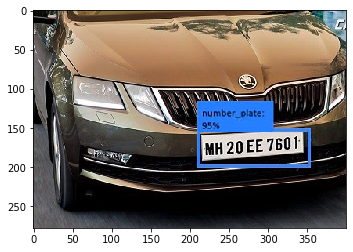

In [375]:
c=cv2.imread("test1.jpeg")
plt.imshow(c)

# RECOGNIZE LICENSE PLATE